# Mass dependent cuts for pairAGraph

**Goal:** I was able to see (in `GraphNN\Mass dependent cuts.ipynb`) that applying the MDpT and MDR cuts for paragraph eliminated the harder to model background regions for 2016, so since I'm about to look at 2017 and 2018 for NSF trainings, I wanted to see if this intuition held for these regions as well or not.

In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import combinations

import matplotlib.pyplot as plt
from matplotlib import gridspec

import os
os.sys.path.append('../code')
from plotting import SR_x, SR_y1, SR_y2, CR_x, CR_y1, CR_y2, SB_x, SB_y1, SB_y2
os.sys.path.append('../Flow-Models/')
from densityEstimate import *
from densityPlots import *

%load_ext autoreload
%autoreload 2

Running w/ conda env: don't import root packages.


Load in the 2b pairAGraph sample.

In [1]:
yrShort = 16

In [2]:
subDir = f'data{yrShort}_PFlow-FEB20-5jets'
tag = '_SM_2b_p_0.01'
seedTag = ''
prodTag = 'FEB20'
ntag = 2

lr, beta, N, L, H,h = 1e-3,1e-3,1,1,10,16
cols = ['log_pT_h1','log_pT_h2','eta_h2','eta_h1','log_dphi_hh']

# Load in the model
s = f'm_h1>{126-45} & m_h1<{126+45} & m_h2>{116-45} & m_h2<{116+45}'
d = data(5, yrShort, prodTag, tag, ntag, s)

mask = (d.df.abs_deta_hh < 1.5) 
d.mlPrepare(mask,cols,N=-1)

NameError: name 'data' is not defined

In [27]:
text = "$\mathbf{ATLAS}$ data Internal\n"
text += f"20{yrShort} data FEB2020 MNT prod\n"
text += r"DL1r 77% WP, $\mathrm{\mathbb{P}}_{SM}$"

In [28]:
figDir = f'figures/{subDir}_SM_2b_p_0.01_2b_detaCut/intuitionPlots'
figDir

'figures/data16_PFlow-FEB20-5jets_SM_2b_p_0.01_2b_detaCut/intuitionPlots'

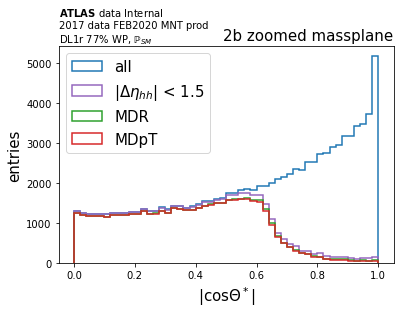

In [17]:
m = np.ones_like(d.df.index).astype(bool)
    
for mi,l,c in zip([np.ones_like(d.df.index).astype(bool), (d.df.abs_deta_hh < 1.5), d.df.MDR, d.df.MDpT],
                  ['all','$|\Delta \eta_{hh}|$ < 1.5','MDR','MDpT'],
                  ['C0','C4','C2','C3']):

    m = m & mi
    
    plt.hist(d.df.loc[m,'absCosThetaStar'],50,(0,1),histtype='step',label=l,lw=1.5,color=c)
    
plt.xlabel('$|\cos \Theta^*|$',fontsize=15)
plt.ylabel('entries',fontsize=15)

plt.title('2b zoomed massplane',fontsize=15,loc='right')
plt.legend(fontsize=15,loc='upper left')

ax = plt.gca()
plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)

plt.savefig(f'{figDir}/absCosThetaStar_zoomedMassplane.pdf')


In [18]:
np.min(d.df.m_h1)

81.00016321404439

Oooooh - v nice, and maybe I could make this a ratio w/r.t. $\Delta \eta_{hh}$??

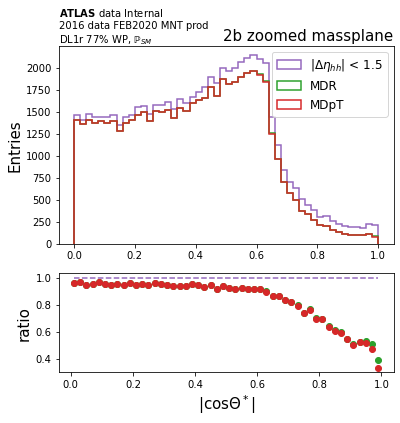

In [29]:
fig = plt.figure(figsize = (6,6))
gs = gridspec.GridSpec(2,1,height_ratios=[2,1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])


m = (d.df.abs_deta_hh < 1.5)
    
n0,e = np.histogram(d.df.loc[m,'absCosThetaStar'],50,(0,1))
xx = 0.5 * ( e[1:] + e[:-1] )
      
plt.plot(xx,np.ones_like(xx),color='C4',ls='--',lw=1.5)
    
for mi,l,c in zip([(d.df.abs_deta_hh < 1.5), d.df.MDR, d.df.MDpT],
                  ['$|\Delta \eta_{hh}|$ < 1.5','MDR','MDpT'],['C4','C2','C3']):

    m = m & mi
    
    n,_,_ = ax0.hist(d.df.loc[m,'absCosThetaStar'],50,(0,1),histtype='step',label=l,color=c,lw=1.5)
    
    if c != 'C4':
        plt.scatter(xx, n / n0, color=c)
    
    
ax1.set_xlabel('$|\cos \Theta^*|$',fontsize=15)
ax0.set_ylabel('Entries',fontsize=15)
ax1.set_ylabel('ratio',fontsize=15)

ax0.legend(fontsize=12,loc='upper right')

ax0.text(0,1,text,ha='left',va='bottom',transform=ax0.transAxes)
ax0.set_title('2b zoomed massplane',fontsize=15,loc='right')

plt.savefig(f'{figDir}/absCosThetaStar_zoomedMassplane_ratio.pdf')

plt.show()

Yes - we *are* preferentially cutting out this high $|\cos \Theta^*|$ region!!

**Next:** How does it look in the SR?

In [ ]:
from preprocess import M

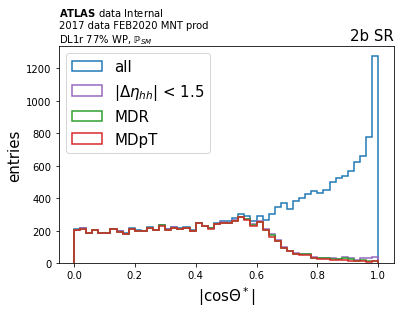

In [20]:
m = np.ones_like(d.df.index).astype(bool)
    
for mi,l,c in zip([(d.df.kinematic_region ==0),
                   (d.df.abs_deta_hh < 1.5), d.df.MDR, d.df.MDpT],
                  ['all','$|\Delta \eta_{hh}|$ < 1.5','MDR','MDpT'],
                  ['C0','C4','C2','C3']):

    m = m & mi
    
    plt.hist(d.df.loc[m,'absCosThetaStar'],50,(0,1),histtype='step',label=l,lw=1.5,color=c)
    
plt.xlabel('$|\cos \Theta^*|$',fontsize=15)
plt.ylabel('entries',fontsize=15)

plt.title('2b SR',fontsize=15,loc='right')
plt.legend(fontsize=15,loc='upper left')

ax = plt.gca()
plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)

plt.savefig(f'{figDir}/absCosThetaStar_SR.pdf')

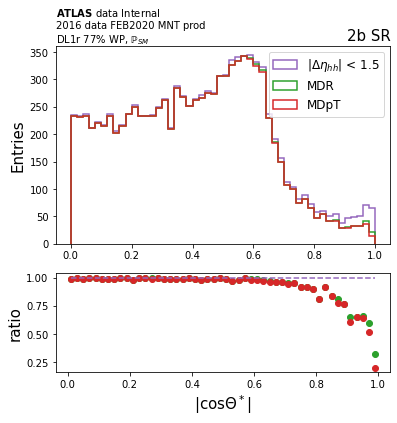

In [30]:
fig = plt.figure(figsize = (6,6))
gs = gridspec.GridSpec(2,1,height_ratios=[2,1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])


m = (d.df.kinematic_region == 0) & (d.df.abs_deta_hh < 1.5)
    
n0,e = np.histogram(d.df.loc[m,'absCosThetaStar'],50,(0,1))
xx = 0.5 * ( e[1:] + e[:-1] )
      
plt.plot(xx,np.ones_like(xx),color='C4',ls='--',lw=1.5)
    
for mi,l,c in zip([(d.df.abs_deta_hh < 1.5), d.df.MDR, d.df.MDpT],
                  ['$|\Delta \eta_{hh}|$ < 1.5','MDR','MDpT'],['C4','C2','C3']):

    m = m & mi
    
    n,_,_ = ax0.hist(d.df.loc[m,'absCosThetaStar'],50,(0,1),histtype='step',label=l,color=c,lw=1.5)
    
    if c != 'C4':
        plt.scatter(xx, n / n0, color=c)
    
    
ax1.set_xlabel('$|\cos \Theta^*|$',fontsize=15)
ax0.set_ylabel('Entries',fontsize=15)
ax1.set_ylabel('ratio',fontsize=15)

ax0.legend(fontsize=12,loc='upper right')

ax0.text(0,1,text,ha='left',va='bottom',transform=ax0.transAxes)
ax0.set_title('2b SR',fontsize=15,loc='right')

#plt.savefig(f'{figDir}/absCosThetaStar_SR_ratio.pdf')

plt.show()

Ok - it's a tiny bit noisy (b/c I downsampled the stats), but this is awesome, the stability is so much better in this region now

**Next Q:** Do we need both MDR and MDpT, or is just one sufficient?

**Plan:** Just invert the order that these cuts are being applied and check!


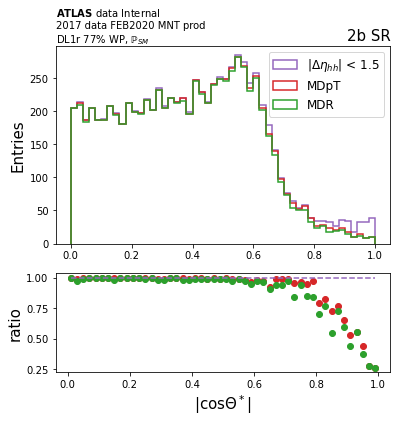

In [22]:
fig = plt.figure(figsize = (6,6))
gs = gridspec.GridSpec(2,1,height_ratios=[2,1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])


m = (d.df.kinematic_region == 0) & (d.df.abs_deta_hh < 1.5)
    
n0,e = np.histogram(d.df.loc[m,'absCosThetaStar'],50,(0,1))
xx = 0.5 * ( e[1:] + e[:-1] )
      
plt.plot(xx,np.ones_like(xx),color='C4',ls='--',lw=1.5)
    
for mi,l,c in zip([(d.df.abs_deta_hh < 1.5), d.df.MDpT, d.df.MDR],
                  ['$|\Delta \eta_{hh}|$ < 1.5','MDpT','MDR'],['C4','C3','C2']):

    m = m & mi
    
    n,_,_ = ax0.hist(d.df.loc[m,'absCosThetaStar'],50,(0,1),histtype='step',label=l,color=c,lw=1.5)
    
    if c != 'C4':
        plt.scatter(xx, n / n0, color=c)
    
    
ax1.set_xlabel('$|\cos \Theta^*|$',fontsize=15)
ax0.set_ylabel('Entries',fontsize=15)
ax1.set_ylabel('ratio',fontsize=15)

ax0.legend(fontsize=12,loc='upper right')

ax0.text(0,1,text,ha='left',va='bottom',transform=ax0.transAxes)
ax0.set_title('2b SR',fontsize=15,loc='right')

plt.savefig(f'{figDir}/absCosThetaStar_SR_ratio_MDpT_first.pdf')

plt.show()

**Message:** The MDR cuts are more aggressive than the MDpT cuts (I feel like this is consistent with intution that I've already built up w/ MDR +$\min\left(D_{hh}\right)$.

I'm not sure which cuts I'll want to apply before training, but at least I can check ipso facto what the interpolation looks like when I apply the model trained w/o these MD cuts to the model w/ these mass cuts and see which (or both) help the modelling more.

In [23]:
year = [16,17,18]

In [24]:
yrCat=''.join([str(yi) for yi in year])
f'{yrCat}testa'

'161718testa'